<a href="https://colab.research.google.com/github/MarcinBernad/fastaiCourse/blob/main/fastai_rozdzial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 12.3 MB/s 
     |████████████████████████████████| 189 kB 50.3 MB/s 
     |████████████████████████████████| 1.2 MB 45.0 MB/s 
     |████████████████████████████████| 48 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 346 kB/s 
     |████████████████████████████████| 561 kB 36.4 MB/s 
     |████████████████████████████████| 130 kB 50.1 MB/s 


In [2]:
import fastbook

In [3]:
from fastbook import *

# Rozdział 1

In [4]:
from fastai.vision.all import *

In [5]:
pwd

'/content'

### Pobieranie zdjęć psów i kotów

In [6]:
path = untar_data(URLs.PETS)/'images'

Trenowanie modelu na gotowym resnet34.

In [8]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=2022,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.141368,0.021064,0.008796,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.048823,0.030440,0.010825,02:11


Import własne zdjęcia w celu sprawdzenia klasyfikacji modelu.

In [11]:
uploader = widgets.FileUpload()

In [12]:
uploader

FileUpload(value={}, description='Upload')

In [13]:
img = PILImage.create(uploader.data[0])

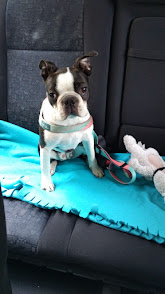

In [19]:
img

In [20]:
is_cat,_,probs = learn.predict(img)

In [21]:
print(f"Czy to jest kot? {is_cat}.")
print(f"Prawdopodobieństwo, że to jest kot: {probs[1].item():.6f}")

Czy to jest kot? False.
Prawdopodobieństwo, że to jest kot: 0.000055
